## Visualizing TensorFlow Graphs in Jupyter Notebooks  
https://blog.jakuba.net/2017/05/30/tensorflow-visualization.html

In [1]:
import tensorflow as tf

In [2]:
a = tf.add(3, 5)

sess = tf.Session()
print (sess.run(a))
sess.close() 

8


In [7]:
[node.name for node in tf.get_default_graph().as_graph_def().node]

['Add/x', 'Add/y', 'Add']

In [8]:
tf.get_default_graph().as_graph_def().node[2].input

['Add/x', 'Add/y']

In [4]:
from graphviz import Digraph

> 없으면 pip install graphviz

In [13]:
dot = Digraph()

for n in tf.get_default_graph().as_graph_def().node:
    dot.node(n.name, label=n.name)
    print (n.name)
    
    for i in n.input:
        dot.edge(i, n.name)
        print (i, n.name)
        
dot

Add/x
Add/y
Add
Add/x Add
Add/y Add


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

시스템적으로 설치할 필요가 있음.  

맥 사용자라면
> brew install graphviz

Add/x
Add/y
Add
Add/x Add
Add/y Add


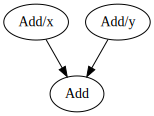

In [14]:
dot = Digraph()

for n in tf.get_default_graph().as_graph_def().node:
    dot.node(n.name, label=n.name)
    print (n.name)
    
    for i in n.input:
        dot.edge(i, n.name)
        print (i, n.name)
        
dot

In [15]:
x = 2
y = 3
op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
useless = tf.multiply(x, op1)
op3 = tf.pow(op2, op1)
with tf.Session() as sess:
    op3, not_useless = sess.run([op3, useless])

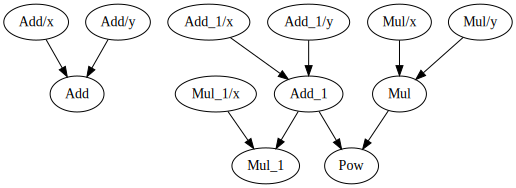

In [17]:
dot = Digraph()

for n in tf.get_default_graph().as_graph_def().node:
    dot.node(n.name, label=n.name)
    
    for i in n.input:
        dot.edge(i, n.name)
        
dot